In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


file_path = r"C:\Users\A266370\OneDrive - Standard Bank\Desktop\Jupyter Projects\Water Usage.xlsx"

df = pd.read_excel(file_path, engine="openpyxl")

df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Count of Water Consumption (L),Column Labels,NaN,NaN,NaN
2,NaN,2020,2021.0,2022.0,Grand Total
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,Row Labels,NaN,NaN,NaN,NaN
6,Bellvile,2,NaN,NaN,2
7,Bellville,4,NaN,3.0,7
8,Camps Bay,5,3.0,2.0,10
9,Claremont,4,5.0,NaN,9


In [9]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Count of Water Consumption (L),Column Labels,NaN,NaN,NaN
2,NaN,2020,2021.0,2022.0,Grand Total
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     object 
 1   Unnamed: 1  14 non-null     object 
 2   Unnamed: 2  10 non-null     float64
 3   Unnamed: 3  12 non-null     float64
 4   Unnamed: 4  14 non-null     object 
dtypes: float64(2), object(3)
memory usage: 892.0+ bytes


In [11]:
df.isnull().sum()

Unnamed: 0    4
Unnamed: 1    5
Unnamed: 2    9
Unnamed: 3    7
Unnamed: 4    5
dtype: int64

In [12]:
df = df.drop_duplicates()

In [16]:
# Ensure we have a Suburb column (the sheet appears to have been read with unnamed columns)
if "Suburb" not in df.columns:
    # try to populate from the left-most column where suburb names are present
    if "Unnamed: 0" in df.columns:
        df["Suburb"] = df["Unnamed: 0"]
    else:
        df["Suburb"] = pd.NA

# Ensure we have a Water Consumption(L) column for downstream cells
if "Water Consumption(L)" not in df.columns:
    # prefer the right-most / Grand Total column if present
    if "Unnamed: 4" in df.columns:
        df["Water Consumption(L)"] = df["Unnamed: 4"]
    elif "Unnamed: 1" in df.columns:
        df["Water Consumption(L)"] = df["Unnamed: 1"]
    else:
        df["Water Consumption(L)"] = pd.NA

# strip whitespace and remove header/footer rows that got read into the dataframe
df["Suburb"] = df["Suburb"].astype(str).str.strip()

# drop rows that are not actual suburb data
df = df[~df["Suburb"].isin(["Row Labels", "Count of Water Consumption (L)", "Grand Total", "nan", "None"])]
df = df.dropna(subset=["Suburb"])

# fix common misspellings
df["Suburb"] = df["Suburb"].replace({
    "Bellvile": "Bellville",
    "SeaPoint": "Sea Point",
    "SeaPint": "Sea Point"
})

In [17]:
df["Water Consumption(L)"] = pd.to_numeric(
    df["Water Consumption(L)"], errors="coerce"
)

In [19]:
median_value = df["Water Consumption(L)"].median()
df["Water Consumption(L)"].fillna(median_value, inplace=True)

C:\Users\A266370\AppData\Local\Temp\1\ipykernel_26216\288592198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Water Consumption(L)"].fillna(median_value, inplace=True)


In [20]:
Q1 = df["Water Consumption(L)"].quantile(0.25)
Q3 = df["Water Consumption(L)"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["Water Consumption(L)"] < Q1 - 1.5 * IQR) |
    (df["Water Consumption(L)"] > Q3 + 1.5 * IQR)
]

outliers

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Suburb,Water Consumption(L)


In [24]:
df_clean = df.copy()
df_clean

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Suburb,Water Consumption(L)
6,Bellvile,2,NaN,NaN,2,Bellville,2
7,Bellville,4,NaN,3.0,7,Bellville,7
8,Camps Bay,5,3.0,2.0,10,Camps Bay,10
9,Claremont,4,5.0,NaN,9,Claremont,9
10,Constantia,1,1.0,5.0,7,Constantia,7
11,Hout Bay,2,3.0,5.0,10,Hout Bay,10
12,Khayelitsha,3,NaN,3.0,6,Khayelitsha,6
13,Mowbray,2,4.0,3.0,9,Mowbray,9
14,Pinelands,5,4.0,5.0,14,Pinelands,14
15,Sea Point,2,2.0,6.0,10,Sea Point,10


In [22]:
avg_consumption = (
    df_clean
    .groupby("Suburb")["Water Consumption(L)"]
    .mean()
    .sort_values(ascending=False)
)

avg_consumption

Suburb
Pinelands      14.0
Wynberg        11.0
Hout Bay       10.0
Camps Bay      10.0
Mowbray         9.0
Claremont       9.0
Constantia      7.0
Khayelitsha     6.0
Sea Point       6.0
Bellville       4.5
Name: Water Consumption(L), dtype: float64

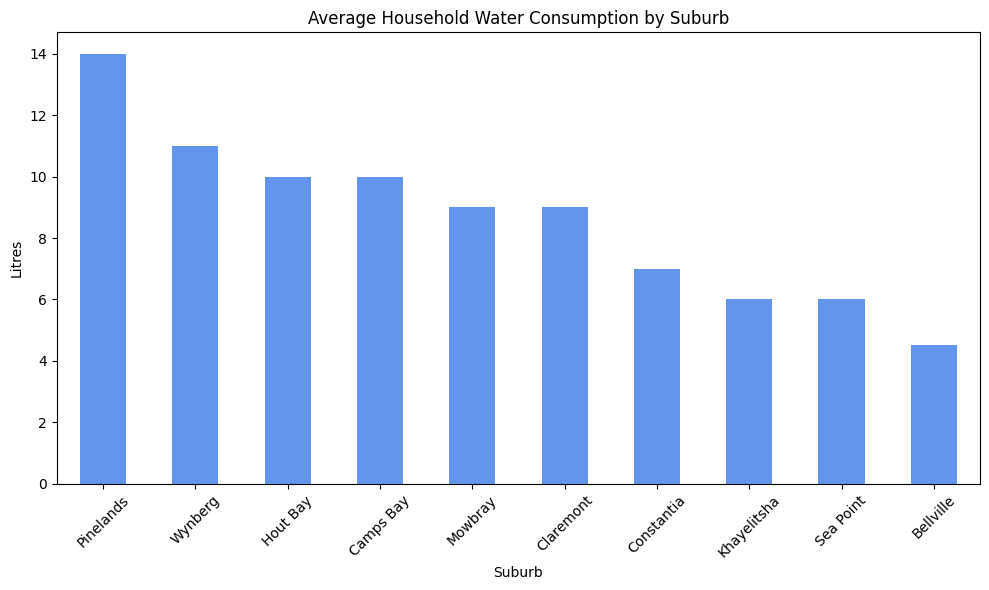

In [23]:
plt.figure(figsize=(10,6))
avg_consumption.plot(kind="bar", color="cornflowerblue")
plt.title("Average Household Water Consumption by Suburb")
plt.ylabel("Litres")
plt.xlabel("Suburb")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()